# Visualize Electrode Placement

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
patients_df = pd.read_excel("./data/selected_patients.xlsx")
patients_df

,hup_id,region,lateralization,weight_kg,r_id
0,138,mesial temporal,left,84.4,278
1,140,mesial temporal,left,56.7,320
2,141,mesial temporal,right,85.7,294
3,142,mesial temporal,left,65.3,295
4,162,mesial temporal,left,47.1,412
5,163,mesial temporal,left,82.1,279
6,164,mesial temporal,left,95.3,386
7,173,mesial temporal,right,76.6,31
8,181,mesial temporal,left,63.0,490
9,185,mesial temporal,left,76.2,332


In [3]:
# Load master_elecs.csv from ./data/
master_elecs_df = pd.read_csv("./data/master_elecs.csv")

# only take the numbers in rid column
master_elecs_df["rid"] = master_elecs_df["rid"].str.extract("(\d+)", expand=False)
master_elecs_df["rid"] = master_elecs_df["rid"].astype(int)

# Drop mni_x, mni_y, mni_z, mm_x, mm_y, mm_z columns
master_elecs_df = master_elecs_df.drop(
    columns=["mni_x", "mni_y", "mni_z", "mm_x", "mm_y", "mm_z"]
)

master_elecs_df

,rid,name,vox_x,vox_y,vox_z,label,soz,resected,spike_rate,engel
0,13,LST01,80.6116,106.5480,64.5941,left inferior temporal,False,False,1.091902,1.0
1,13,LST02,72.0779,109.4150,63.1223,left inferior temporal,False,False,1.091902,1.0
2,13,LST03,64.9060,112.3760,68.7455,EmptyLabel,False,False,1.419472,1.0
3,13,LST04,65.0210,114.6600,78.2339,left middle temporal,False,False,0.655141,1.0
4,13,MST01,131.7410,64.3756,70.4205,right lingual,True,False,3.439490,1.0
...,...,...,...,...,...,...,...,...,...,...
14212,785,RB08,154.2550,114.2730,136.7560,EmptyLabel,False,NaN,0.369914,1.0
14213,785,RB09,159.1350,111.9920,136.6960,EmptyLabel,False,NaN,0.665845,1.0
14214,785,RB10,164.7520,109.9030,137.7640,right middle temporal,False,NaN,4.586930,1.0
14215,785,RB11,169.6320,107.6220,137.7040,right middle temporal,False,NaN,2.071517,1.0


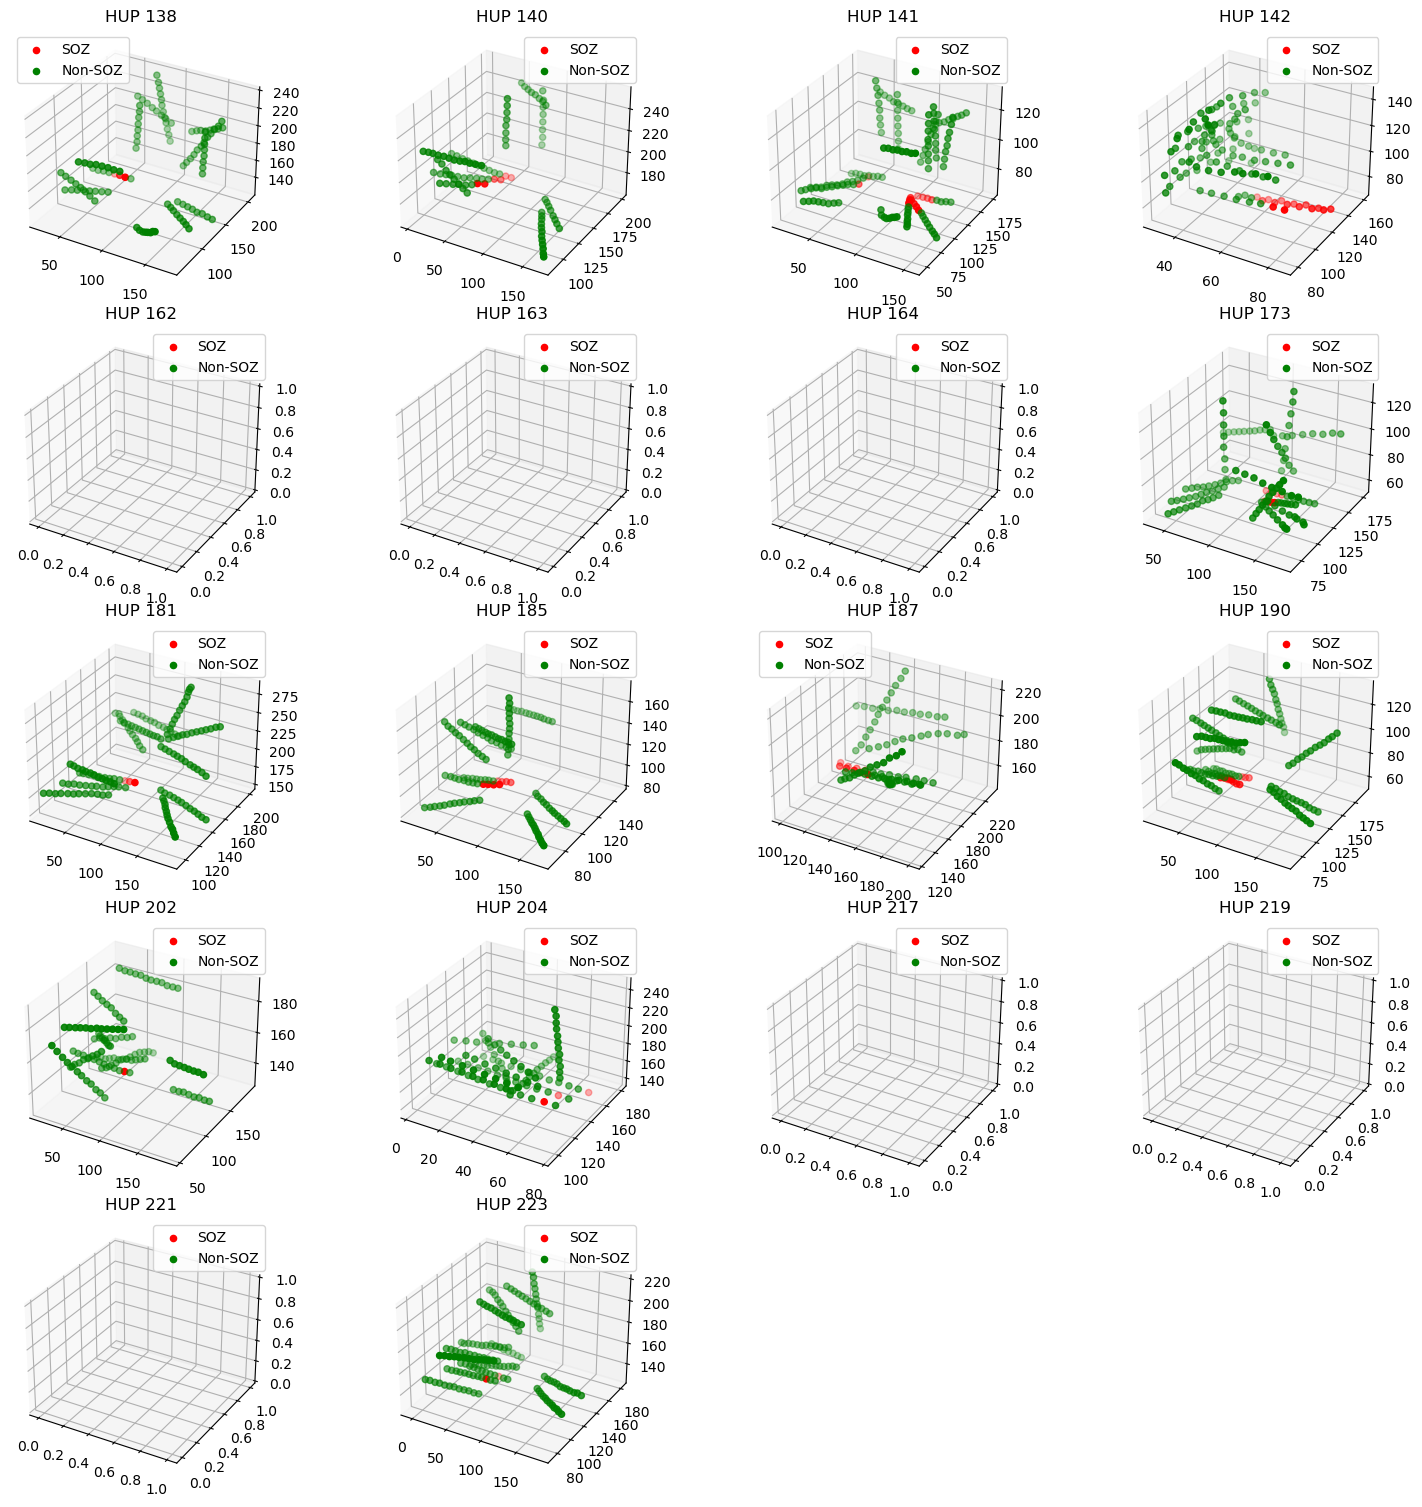

In [4]:
# Number of patients
n_patients = patients_df.shape[0]

# Create a grid of subplots
n_rows = int(np.ceil(np.sqrt(n_patients)))
n_cols = int(np.ceil(n_patients / n_rows))

# create a plot with number of subplots equal to number of patients in patients_df
fig, axs = plt.subplots(
    n_rows, n_cols, figsize=(15, 15), subplot_kw={"projection": "3d"}
)

axs = axs.flatten()  # flatten the array to make iteration easier

# iterate through each patient in patients_df
for index, (ax, (_, row)) in enumerate(zip(axs, patients_df.iterrows())):
    # find the rows in master_elecs_df that have the same rid
    patient_electrodes_df = master_elecs_df[master_elecs_df["rid"] == row["r_id"]]

    x_soz, y_soz, z_soz = (
        patient_electrodes_df[patient_electrodes_df["soz"] == True]["vox_x"],
        patient_electrodes_df[patient_electrodes_df["soz"] == True]["vox_y"],
        patient_electrodes_df[patient_electrodes_df["soz"] == True]["vox_z"],
    )
    x_nsoz, y_nsoz, z_nsoz = (
        patient_electrodes_df[patient_electrodes_df["soz"] == False]["vox_x"],
        patient_electrodes_df[patient_electrodes_df["soz"] == False]["vox_y"],
        patient_electrodes_df[patient_electrodes_df["soz"] == False]["vox_z"],
    )
    # Plot a 3D scatter plot of the electrodes using x, y, z
    ax.scatter(x_soz, y_soz, z_soz, c="red")  # SOZ true in red
    ax.scatter(x_nsoz, y_nsoz, z_nsoz, c="green")  # SOZ false in green
    ax.set_title(f"HUP {row.hup_id}")
    ax.legend(["SOZ", "Non-SOZ"])

# If there are more subplots than patients, remove the extras
for i in range(n_patients, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

**Conclusions:**
1. These are all SEEG depth electrodes.
2. No grid ECoG electrodes are present.